# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline



In [2]:
import dtreeviz
import graphviz

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#removendo a coluna com varáveis do tipo string para realizar os métodos com skleanr
X = df.drop(columns='ocean_proximity')


In [5]:
print(X.shape)
X.isna().sum()

(20640, 9)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [6]:
X = X.drop(columns='total_bedrooms')

In [7]:
print(X.shape)

(20640, 8)


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [11]:
X.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.857126,0.918484,0.198050,0.134153
population,0.099773,-0.108785,-0.296244,0.857126,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,-0.024650,0.065843,0.688075,1.000000


Aparentemente as variaveis "total_rooms", "population" e "households" possuem relação provavelmente por conta
do tamanho das famílias serem diretamente proporcional às estruturas das casas. Outras variáveis que possuem relações interessantes são as variávies de 
"median_house_value" e "median_income", que seria o valor médio da vasa e o valor médio de renda.

### 3. Separe os dados em validação e teste

In [14]:
y = df['median_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
                                                    
tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2402)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2402)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (15480, 8)
X_test: (5160, 8)
y_train: (15480,)
y_test: (5160,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [16]:
tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2360873)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2360873)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2360873)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [18]:
mse1_train = mean_squared_error(y_true=y_train, y_pred=tree_1.predict(X_train))
mse1_test = mean_squared_error(y_true=y_test, y_pred=tree_1.predict(X_test))

mse2_train = mean_squared_error(y_true=y_train, y_pred=tree_2.predict(X_train))
mse2_test = mean_squared_error(y_true=y_test, y_pred=tree_2.predict(X_test))

template = 'O erro quadrático médio (MSE) da árvore com profunidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', mse1_train).replace('.', ','))
print(template.format(tree_1.get_depth(), 'teste', mse1_test).replace('.', ','), '\n')

print(template.format(tree_2.get_depth(), 'treino', mse2_train).replace('.', ','))
print(template.format(tree_2.get_depth(), 'teste', mse2_test).replace('.', ','))

O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de treino é: 0,00
O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de teste é: 0,00 

O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de treino é: 0,48
O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de teste é: 0,48


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [20]:
print(f'A árvore que parece mais adequada é `tree_1` com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é `tree_1` com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2360873)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

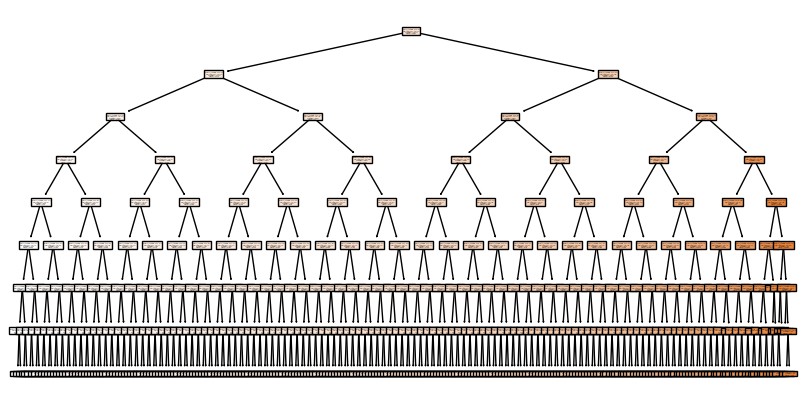

In [22]:
plt.rc('figure', figsize=(10, 5))
tp = tree.plot_tree(tree_1, 
                    feature_names=X.columns,  
                    filled=True) 

In [23]:
text_tree_print = tree.export_text(decision_tree=tree_1)

print(text_tree_print)

|--- feature_6 <= 4.62
|   |--- feature_6 <= 2.93
|   |   |--- feature_6 <= 2.06
|   |   |   |--- feature_6 <= 1.52
|   |   |   |   |--- feature_6 <= 1.11
|   |   |   |   |   |--- feature_6 <= 0.79
|   |   |   |   |   |   |--- feature_6 <= 0.60
|   |   |   |   |   |   |   |--- feature_6 <= 0.52
|   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |--- feature_6 >  0.52
|   |   |   |   |   |   |   |   |--- value: [0.54]
|   |   |   |   |   |   |--- feature_6 >  0.60
|   |   |   |   |   |   |   |--- feature_6 <= 0.73
|   |   |   |   |   |   |   |   |--- value: [0.69]
|   |   |   |   |   |   |   |--- feature_6 >  0.73
|   |   |   |   |   |   |   |   |--- value: [0.76]
|   |   |   |   |   |--- feature_6 >  0.79
|   |   |   |   |   |   |--- feature_6 <= 0.96
|   |   |   |   |   |   |   |--- feature_6 <= 0.88
|   |   |   |   |   |   |   |   |--- value: [0.83]
|   |   |   |   |   |   |   |--- feature_6 >  0.88
|   |   |   |   |   |   |   |   |--- value: [0.92]
|   | 

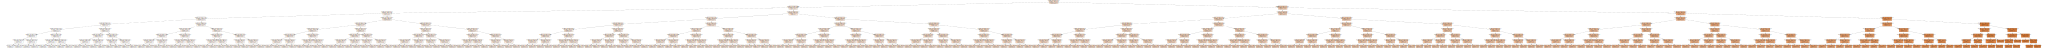

In [24]:
dot_data = tree.export_graphviz(decision_tree=tree_1, 
                                out_file=None, 
                                feature_names=X.columns, 
                                filled=True)

graphviz.Source(dot_data, format='png')


In [25]:
viz_model = dtreeviz.model(model=tree_1, 
               X_train=X, 
               y_train=y, 
               target_name='target', 
               feature_names=X.columns
              ).view()

viz_model.view()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
C:\Users\User\AppData\Local\Temp\ipykernel_12792\2292259412.py:8: DeprecationWarning: DTreeVizRender.view() function is deprecated starting from version 2.0. 
 Please use display() instead


A variável que parece ser mais importante é a da primeira quebra da árvore, 'median_income', que representa a renda média por habitação, possivelmente com o menor Erro Quadrático Médio (EQM) entre todas as variáveis.